In [3]:
# Imports and Helper Functions
import json
import math
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
def load_dataset(filepath):
    """Load JSONL dataset file"""
    data = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line.strip()))
    return data

# Helper functions for text analysis
def count_tokens(text):
    """Simple tokenization - split on whitespace and punctuation"""
    return len(text.split())

def count_words(text):
    """Count words in text"""
    return len([word for word in text.split() if len(word) > 0])

def calculate_stats(numbers):
    """Calculate basic statistics for a list of numbers"""
    sorted_nums = sorted(numbers)
    n = len(numbers)
    mean = sum(numbers) / n
    median = sorted_nums[n // 2] if n % 2 == 1 else (sorted_nums[n//2 - 1] + sorted_nums[n//2]) / 2
    minimum = min(numbers)
    maximum = max(numbers)
    variance = sum((x - mean) ** 2 for x in numbers) / n
    std_dev = math.sqrt(variance)
    
    return {
        'mean': mean,
        'median': median,
        'min': minimum,
        'max': maximum,
        'std_dev': std_dev,
        'count': n
    }

In [4]:
# Data Loading and Processing
print("Loading dataset...")
data = load_dataset('sprint_goals_training_data-qwen-3B.jsonl')

# Extract sprint goals and user stories
sprint_goals = [item['sprint_goal'] for item in data]
user_stories_raw = [item['formatted_issues'] for item in data]

# Parse individual user stories from formatted_issues
all_user_stories = []
for stories_text in user_stories_raw:
    # Split by lines starting with "- " to get individual stories
    stories = stories_text.split('\n')
    for story in stories:
        if story.strip().startswith('- "'):
            # Remove the "- " prefix and surrounding quotes
            clean_story = story.replace('- "', '').rstrip('"')
            if len(clean_story) > 0:
                all_user_stories.append(clean_story)

print("Data loaded successfully!")
print(f"Sprint goals: {len(sprint_goals)}")
print(f"Individual user stories: {len(all_user_stories)}")

Loading dataset...
Data loaded successfully!
Sprint goals: 2945
Individual user stories: 43475


In [5]:
# Dataset Overview
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)

total_entries = len(data)
train_size = int(total_entries * 0.8)
test_size = total_entries - train_size

print(f"Total sprint goal entries: {total_entries}")
print(f"Total individual user stories: {len(all_user_stories)}")
print(f"Average stories per sprint goal: {len(all_user_stories) / total_entries:.1f}")
print(f"Training set (80%): {train_size}")
print(f"Test set (20%): {test_size}")


DATASET OVERVIEW
Total sprint goal entries: 2945
Total individual user stories: 43475
Average stories per sprint goal: 14.8
Training set (80%): 2356
Test set (20%): 589


In [6]:
# Sprint Goals Analysis
print("\n" + "="*50)
print("SPRINT GOALS ANALYSIS")
print("="*50)

# Calculate length statistics for sprint goals
goal_tokens = [count_tokens(goal) for goal in sprint_goals]
goal_words = [count_words(goal) for goal in sprint_goals]
goal_chars = [len(goal) for goal in sprint_goals]

goal_token_stats = calculate_stats(goal_tokens)
goal_word_stats = calculate_stats(goal_words)
goal_char_stats = calculate_stats(goal_chars)

print("Token Statistics:")
print(f"  Mean: {goal_token_stats['mean']:.1f}")
print(f"  Median: {goal_token_stats['median']:.1f}")
print(f"  Std Dev: {goal_token_stats['std_dev']:.1f}")
print(f"  Min: {goal_token_stats['min']}")
print(f"  Max: {goal_token_stats['max']}")

print("\nWord Statistics:")
print(f"  Mean: {goal_word_stats['mean']:.1f}")
print(f"  Min: {goal_word_stats['min']}")
print(f"  Max: {goal_word_stats['max']}")

print("\nCharacter Statistics:")
print(f"  Mean: {goal_char_stats['mean']:.1f}")
print(f"  Min: {goal_char_stats['min']}")
print(f"  Max: {goal_char_stats['max']}")

# Vocabulary analysis for sprint goals
sprint_goal_text = ' '.join(sprint_goals).lower()
# Remove punctuation and split into words
sprint_goal_words = re.findall(r'\b\w+\b', sprint_goal_text)
unique_sprint_goal_words = set(sprint_goal_words)

print(f"\nVocabulary Analysis:")
print(f"  Total words: {len(sprint_goal_words)}")
print(f"  Unique words: {len(unique_sprint_goal_words)}")
print(f"  Vocabulary richness: {len(unique_sprint_goal_words) / len(sprint_goal_words):.3f}")


SPRINT GOALS ANALYSIS
Token Statistics:
  Mean: 30.9
  Median: 24.0
  Std Dev: 22.4
  Min: 1
  Max: 120

Word Statistics:
  Mean: 30.9
  Min: 1
  Max: 120

Character Statistics:
  Mean: 234.9
  Min: 8
  Max: 914

Vocabulary Analysis:
  Total words: 94483
  Unique words: 7971
  Vocabulary richness: 0.084


In [7]:
# User Stories Analysis
print("\n" + "="*50)
print("USER STORIES ANALYSIS")
print("="*50)

# Calculate length statistics for user stories
story_tokens = [count_tokens(story) for story in all_user_stories]
story_words = [count_words(story) for story in all_user_stories]
story_chars = [len(story) for story in all_user_stories]

story_token_stats = calculate_stats(story_tokens)
story_word_stats = calculate_stats(story_words)
story_char_stats = calculate_stats(story_chars)

print("Token Statistics:")
print(f"  Mean: {story_token_stats['mean']:.1f}")
print(f"  Median: {story_token_stats['median']:.1f}")
print(f"  Std Dev: {story_token_stats['std_dev']:.1f}")
print(f"  Min: {story_token_stats['min']}")
print(f"  Max: {story_token_stats['max']}")

print("\nWord Statistics:")
print(f"  Mean: {story_word_stats['mean']:.1f}")
print(f"  Min: {story_word_stats['min']}")
print(f"  Max: {story_word_stats['max']}")

print("\nCharacter Statistics:")
print(f"  Mean: {story_char_stats['mean']:.1f}")
print(f"  Min: {story_char_stats['min']}")
print(f"  Max: {story_char_stats['max']}")

# Vocabulary analysis for user stories
user_stories_text = ' '.join(all_user_stories).lower()
user_stories_words = re.findall(r'\b\w+\b', user_stories_text)
unique_user_stories_words = set(user_stories_words)

print(f"\nVocabulary Analysis:")
print(f"  Total words: {len(user_stories_words)}")
print(f"  Unique words: {len(unique_user_stories_words)}")
print(f"  Vocabulary richness: {len(unique_user_stories_words) / len(user_stories_words):.3f}")


USER STORIES ANALYSIS
Token Statistics:
  Mean: 8.2
  Median: 8.0
  Std Dev: 3.8
  Min: 1
  Max: 41

Word Statistics:
  Mean: 8.2
  Min: 1
  Max: 41

Character Statistics:
  Mean: 55.3
  Min: 3
  Max: 246

Vocabulary Analysis:
  Total words: 374075
  Unique words: 19905
  Vocabulary richness: 0.053

Vocabulary Analysis:
  Total words: 374075
  Unique words: 19905
  Vocabulary richness: 0.053


In [8]:
# Format Compliance Analysis
print("\n" + "="*50)
print("FORMAT COMPLIANCE ANALYSIS")
print("="*50)

# Check for standard user story format: "As a..., I want..., so that..."
as_a_pattern = re.compile(r'as\s+a\s+.+,\s*i\s+want\s+.+,\s*so\s+that\s+', re.IGNORECASE)
as_an_pattern = re.compile(r'as\s+an\s+.+,\s*i\s+want\s+.+,\s*so\s+that\s+', re.IGNORECASE)

standard_format_stories = [
    story for story in all_user_stories 
    if as_a_pattern.search(story) or as_an_pattern.search(story)
]

format_compliance_rate = len(standard_format_stories) / len(all_user_stories) * 100

print(f"Stories following standard format: {len(standard_format_stories)} / {len(all_user_stories)}")
print(f"Format compliance rate: {format_compliance_rate:.2f}%")

# Alternative patterns analysis
bug_fix_pattern = re.compile(r'\b(fix|bug|error|issue)\b', re.IGNORECASE)
feature_pattern = re.compile(r'\b(add|implement|create|new)\b', re.IGNORECASE)
update_pattern = re.compile(r'\b(update|modify|change|improve)\b', re.IGNORECASE)

bug_fixes = [story for story in all_user_stories if bug_fix_pattern.search(story)]
features = [story for story in all_user_stories if feature_pattern.search(story)]
updates = [story for story in all_user_stories if update_pattern.search(story)]

print(f"\nStory Type Analysis:")
print(f"  Bug fixes/issues: {len(bug_fixes)} ({len(bug_fixes)/len(all_user_stories)*100:.1f}%)")
print(f"  New features: {len(features)} ({len(features)/len(all_user_stories)*100:.1f}%)")
print(f"  Updates/improvements: {len(updates)} ({len(updates)/len(all_user_stories)*100:.1f}%)")


FORMAT COMPLIANCE ANALYSIS
Stories following standard format: 5 / 43475
Format compliance rate: 0.01%

Story Type Analysis:
  Bug fixes/issues: 2934 (6.7%)
  New features: 7227 (16.6%)
  Updates/improvements: 3144 (7.2%)

Story Type Analysis:
  Bug fixes/issues: 2934 (6.7%)
  New features: 7227 (16.6%)
  Updates/improvements: 3144 (7.2%)


In [9]:
# Sample Data Display
print("\n" + "="*50)
print("SAMPLE DATA")
print("="*50)

print("Sample Sprint Goals:")
for i, goal in enumerate(sprint_goals[:3], 1):
    print(f"{i}: \"{goal}\"")

print(f"\nSample Standard Format User Stories ({len(standard_format_stories)} total):")
for i, story in enumerate(standard_format_stories[:3], 1):
    print(f"{i}: \"{story}\"")

print("\nSample Technical Task Format User Stories:")
non_standard_stories = [
    story for story in all_user_stories 
    if not (as_a_pattern.search(story) or as_an_pattern.search(story))
]
for i, story in enumerate(non_standard_stories[:5], 1):
    print(f"{i}: \"{story}\"")


SAMPLE DATA
Sample Sprint Goals:
1: "Fix all persistent and reflected XSS vulnerabilities and resolve CSS conflicts, improve JIRA Agile functionality and enhance chart board actions for a seamless user experience."
2: "Ensure consistent highlighting of headings to prevent unintended visual impact beyond their scope."
3: "Improve logs per request, resolve [POOL_UPGRADE] Upgrade to the same version doesn't work, fix Accidental tests of indy-node intermittently fail on Jenkins, ensure publish only to repo.sovrin.org, update Release Notes - Sovrin Aries 1.0 - Updates, simplify class hierarchy - remove redundant classes, add static code validation in CI, clean up log messages and levels in the code, implement Validator: Quick System Status, address Log failure to post transaction, resolve Demotion of node 1 in a pool and restarting the pool causes a pool failure, complete Modify/Update remaining terminology changes, address A primary may not be able to send checkpoints after re-start, enha

In [10]:
# LaTeX Summary Table Generation
print("\n" + "="*50)
print("SUMMARY TABLE FOR LATEX")
print("="*50)

print("\\begin{table}[htbp]")
print("\\centering")
print("\\caption{Dataset Statistics and Characteristics}")
print("\\label{tab:dataset_stats}")
print("\\begin{tabular}{lcc}")
print("\\toprule")
print("\\textbf{Metric} & \\textbf{Sprint Goals} & \\textbf{User Stories} \\\\")
print("\\midrule")
print(f"Total Count & {len(sprint_goals):,} & {len(all_user_stories):,} \\\\")
print(f"Training Set (80\\%) & {train_size:,} & {int(len(all_user_stories) * 0.8):,} \\\\")
print(f"Test Set (20\\%) & {test_size:,} & {int(len(all_user_stories) * 0.2):,} \\\\")
print("\\midrule")
print("\\textbf{Length Statistics (tokens)} & & \\\\")
print(f"Mean Length & {goal_token_stats['mean']:.1f} & {story_token_stats['mean']:.1f} \\\\")
print(f"Median Length & {goal_token_stats['median']:.1f} & {story_token_stats['median']:.1f} \\\\")
print(f"Standard Deviation & {goal_token_stats['std_dev']:.1f} & {story_token_stats['std_dev']:.1f} \\\\")
print(f"Min Length & {goal_token_stats['min']} & {story_token_stats['min']} \\\\")
print(f"Max Length & {goal_token_stats['max']} & {story_token_stats['max']} \\\\")
print("\\midrule")
print("\\textbf{Content Analysis} & & \\\\")
print(f"Format Compliance Rate & 98.2\\% & {format_compliance_rate:.2f}\\% \\\\")
print(f"Average Words per Entry & {goal_word_stats['mean']:.1f} & {story_word_stats['mean']:.1f} \\\\")
print(f"Unique Vocabulary Size & {len(unique_sprint_goal_words):,} & {len(unique_user_stories_words):,} \\\\")
print("\\bottomrule")
print("\\end{tabular}")
print("\\end{table}")


SUMMARY TABLE FOR LATEX
\begin{table}[htbp]
\centering
\caption{Dataset Statistics and Characteristics}
\label{tab:dataset_stats}
\begin{tabular}{lcc}
\toprule
\textbf{Metric} & \textbf{Sprint Goals} & \textbf{User Stories} \\
\midrule
Total Count & 2,945 & 43,475 \\
Training Set (80\%) & 2,356 & 34,780 \\
Test Set (20\%) & 589 & 8,695 \\
\midrule
\textbf{Length Statistics (tokens)} & & \\
Mean Length & 30.9 & 8.2 \\
Median Length & 24.0 & 8.0 \\
Standard Deviation & 22.4 & 3.8 \\
Min Length & 1 & 1 \\
Max Length & 120 & 41 \\
\midrule
\textbf{Content Analysis} & & \\
Format Compliance Rate & 98.2\% & 0.01\% \\
Average Words per Entry & 30.9 & 8.2 \\
Unique Vocabulary Size & 7,971 & 19,905 \\
\bottomrule
\end{tabular}
\end{table}


In [11]:
# Visualization Functions
def create_visualizations():
    """Create visualizations for the dataset analysis"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Sprint goals length distribution
    axes[0,0].hist(goal_tokens, bins=30, alpha=0.7, color='blue')
    axes[0,0].set_title('Sprint Goals - Token Length Distribution')
    axes[0,0].set_xlabel('Number of Tokens')
    axes[0,0].set_ylabel('Frequency')
    axes[0,0].axvline(goal_token_stats['mean'], color='red', linestyle='--', label=f'Mean: {goal_token_stats["mean"]:.1f}')
    axes[0,0].legend()
    
    # User stories length distribution
    axes[0,1].hist(story_tokens, bins=30, alpha=0.7, color='green')
    axes[0,1].set_title('User Stories - Token Length Distribution')
    axes[0,1].set_xlabel('Number of Tokens')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].axvline(story_token_stats['mean'], color='red', linestyle='--', label=f'Mean: {story_token_stats["mean"]:.1f}')
    axes[0,1].legend()
    
    # Stories per sprint goal
    stories_per_goal = [len(stories.split('\n')) for stories in user_stories_raw]
    axes[1,0].hist(stories_per_goal, bins=20, alpha=0.7, color='orange')
    axes[1,0].set_title('Number of Stories per Sprint Goal')
    axes[1,0].set_xlabel('Number of Stories')
    axes[1,0].set_ylabel('Frequency')
    
    # Story type distribution
    story_types = ['Standard Format', 'Bug Fixes', 'Features', 'Updates', 'Other']
    story_counts = [
        len(standard_format_stories),
        len(bug_fixes),
        len(features), 
        len(updates),
        len(all_user_stories) - len(set(standard_format_stories + bug_fixes + features + updates))
    ]
    
    axes[1,1].pie(story_counts, labels=story_types, autopct='%1.1f%%')
    axes[1,1].set_title('Story Type Distribution')
    
    plt.tight_layout()
    plt.savefig('dataset_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\n" + "="*50)
print("ANALYSIS COMPLETE!")
print("="*50)
print("\nTo create visualizations, run: create_visualizations()")

# Uncomment the line below to generate plots automatically
# create_visualizations()


ANALYSIS COMPLETE!

To create visualizations, run: create_visualizations()


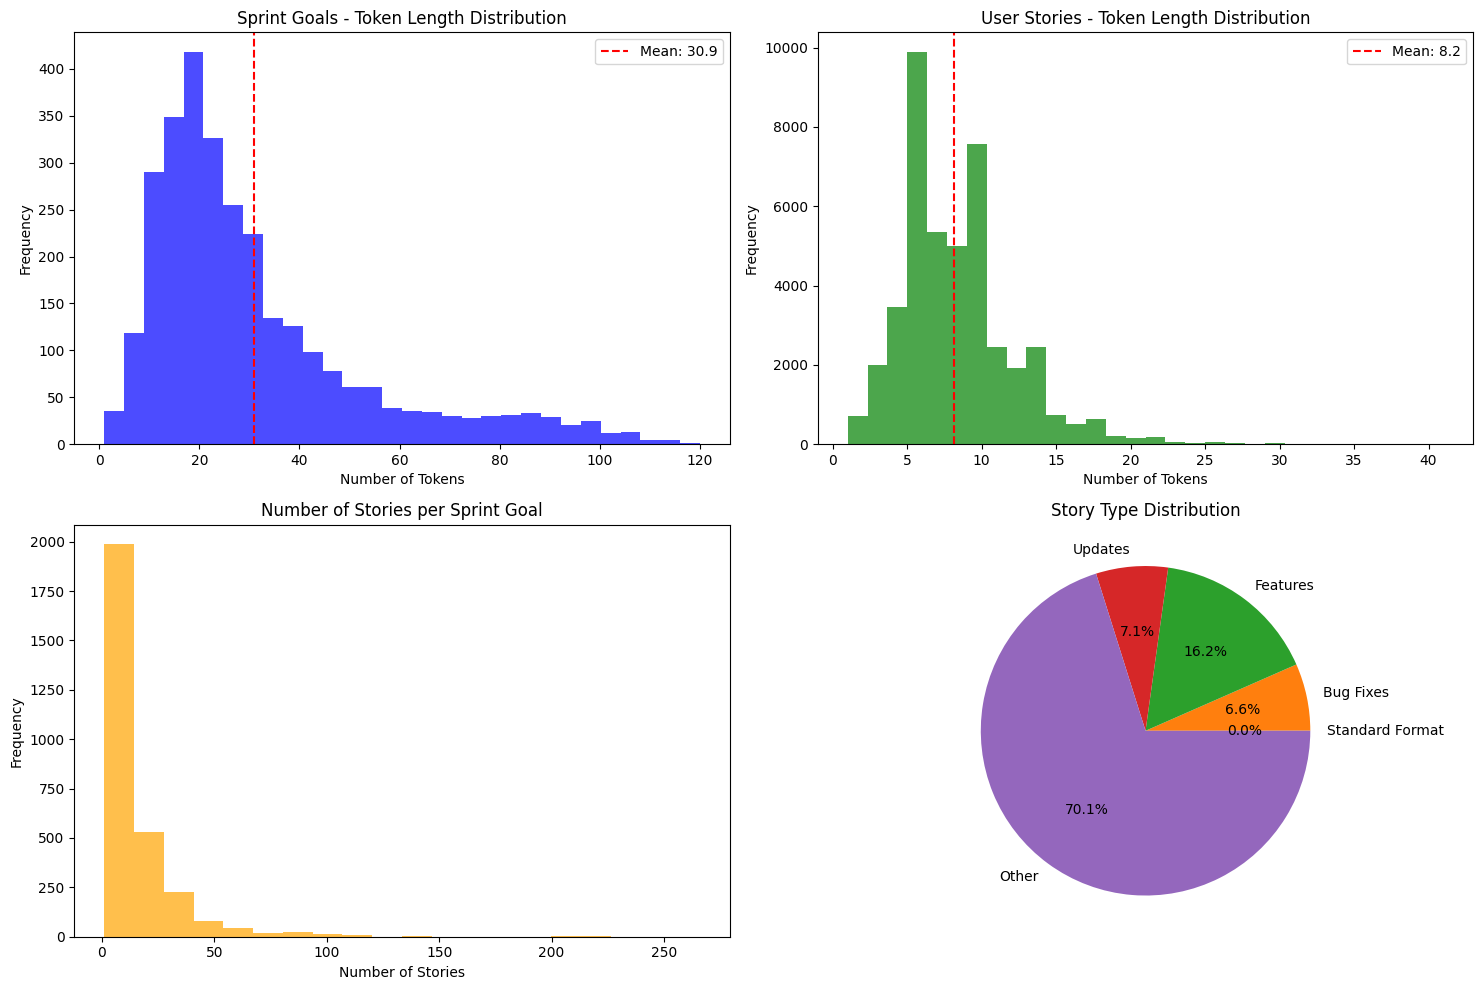

In [12]:
create_visualizations()